<a href="https://colab.research.google.com/github/nurfnick/analyze-first-order-systems/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# System Modeling From Data






## Objective

You have learned in class that you can often define parameters that describe the characteristics of a system. For example in a mass-spring system, changing the spring constant k will impact the behavior of the system. Sometimes, you know these parameters, and you want to use them to predict how a system will behave. However, there might be other times when you can only observe the behavior of a system and you need to use your observations to find the parameters of the system. The objective of this assignment is to derive parameters of a system from data and investigate the sources of uncertainty that arise when we take this approach. We will also learn how to identify nonlinearity in a system and reflect on the implications of doing system analysis with data.

##System of Interest

The system we will be examining in this exercise is the open loop response of a small motorized cart with a voltage applied to the motor. The theoretical transfer function between the position $X(s)$ and applied voltage $V_{in}(s)$ for this system is shown in Figure 1.

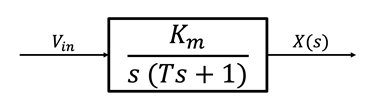

The parameter $K_m$  is the DC gain, and $T$ is the time constant. In this exercise, we use a known voltage input and collect overhead video of the cart traveling from rest to steady-state (or near steady-state).  By tracking the cart with software, you will derive position vs. time from the video, and using python, you will find a numerical derivative of position to find velocity vs. time. You will use these data to calculate the system parameters. The dataset comprises a set of videos at three different voltages for two different carts.  
Next, let us look at the cart, data collection, and analysis process.

## Description of Cart

There were two carts used for this assignment. Figure 2 shows  a close up photograph of one of the carts used.

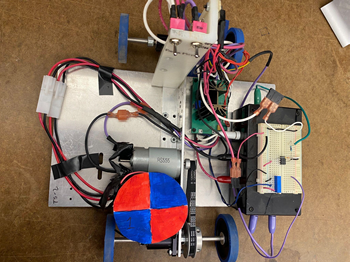

The cart has two axles. The back wheels are belt driven and powered by a brushed DC motor, as shown on the left in Figure 3. The front wheels are not driven, i.e., the cart is rear wheel drive. The voltage to the motor is controlled by the blue potentiometer in the photo on the right of Figure 3, which can be tuned to different voltages between -12 and 12 V.

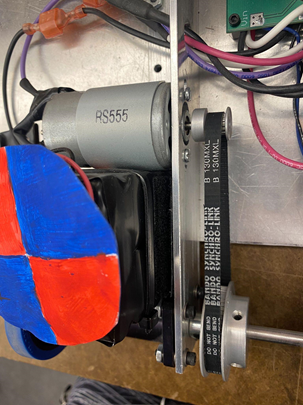

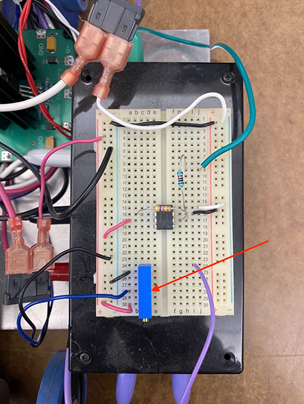


## Data Collection Procedure

For the purposes of this assignment, 60 videos of the carts described above were recorded: 30 for cart 1, 30 for cart 2. For each video, the cart starts at rest. A constant voltage is applied at t=0, and the cart travels in one direction and reaches a steady-state speed. 10 videos were recorded for each cart for three different input voltages:  2.5 V, 3.5 V, and 5 V.
Each video was taken with an iPhone 11 with no zoom on the camera. The phone was held in a tripod extended over the railing of a balcony to video the floor approximately 15 feet below. The batteries of the cart were charged fully before the recording day, but the batteries were not recharged between any runs. The transit occurred over a dusty, smooth granite-tiled floor. The voltage of any particular run may be found in the spreadsheet.
You have been assigned a cart number and a run number for analysis. (find your assignment here: Need to add a link to csv with assignments)

Download and watch the 2.5 Volt video for the cart and run number you have been assigned.

Download the image Tracker software from the internet. It is free and open source: https://physlets.org/tracker/

Launch tracker and drag your downloaded video into the window.
The first step to using the Tracker software is to define a reference length. This is important so that the software has a length reference in physical units when calculating distance traveled. In each video, we placed a 4ft (48in) ruler stick. You can use this as a known length to scale the video frame.
To define the reference length, you will need to select the blue line in the toolbar and select “New -> Calibration Stick”

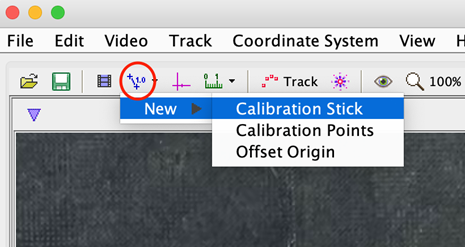

Tracker creates a calibration stick in the middle of the frame. You will need to drag each end of the calibration stick to match up with the start and end of the 4 ft measuring stick (below)

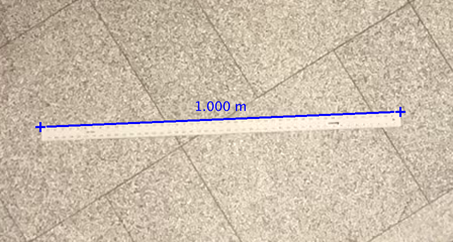

When it is created, the calibration stick has an arbitrarily-assigned length of 1 meter. To tell Tracker that the length of the ruler is actually 4ft, simply double click the blue number and type “4 ft” (including the units “ft”). Tracker will ask if you want to change units to ft. Select yes.


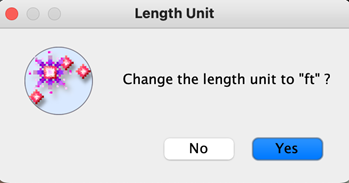

Your calibration stick should now look like this:

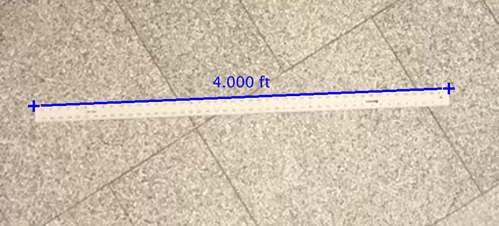

Once you have defined your calibration distance, you will need to add a coordinate system to the video. This ensures that the movement of the cart will be in only one axis. Click the pink axes button to show the axes:

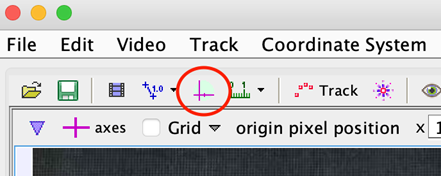

Position the origin of the axes on the blue and red target by clicking and dragging it. To get the angle of the axis correct, advance the video until the cart is farther along the screen. Rotate the horizontal axis using the toggle to the right of the origin (shown below) until the axis intersects the target on the cart along approximately its entire path. Do not simply use the blue line in the video to position your axes! The cart will approximately follow this line but may deviate slightly. After placing the axes, return (rewind) the video to the start.

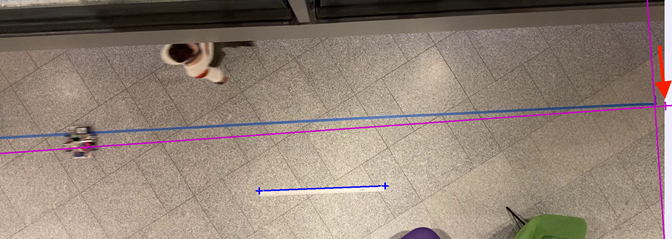

Next, you need to define the object that Physics Tracker will be following over the course of the video. To do that, first create a new point mass by going to track -> new -> point mass.

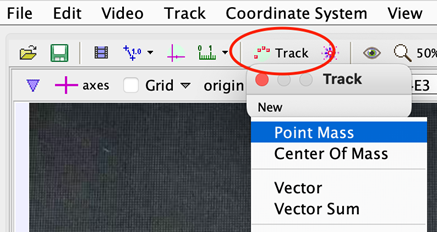

With the video bar back to the beginning of the video, use Ctrl+Shift+Click (Windows) or Cmd+Shift+Click (Mac) to select a point at the center of the blue and red target for the program to track. It is important to select as close to the center as possible. It is easier to do this if you use the zoom function to enlarge the target.

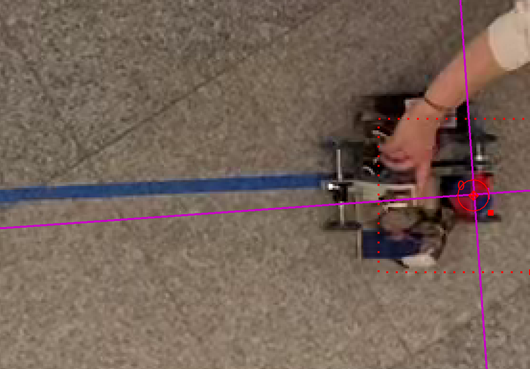

From there, a window will pop up on the right side of the program that allows you to automatically track the target over the course of travel. Click search in the top left to autotrack the target.

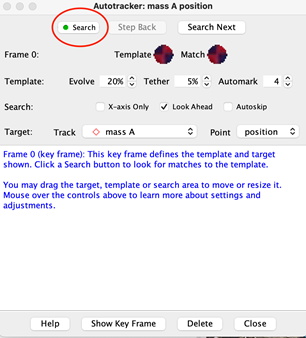

There may be moments when the tracker loses the target - to fix this, shift+click on the center of the target when the frame pauses.

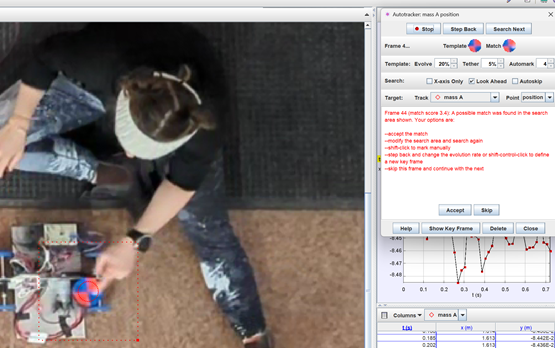

You can stop tracking once a run is complete and/or the vehicle goes out of frame. The position data of the run will be presented in the table in the lower right corner. We will use the position of the cart and the change in time to calculate velocity python. The data can be saved as a .csv file by navigating to File->Export->Data and hitting “Save As”.

## Python Analysis Part 1

Once you have extracted your time series data from Tracker, you can use it to find the system parameters $K_m$ and $T$, as discussed in the introduction.

1. Find the transfer function system with the input being voltage to the motor and output being velocity.
2. If the motor voltage is zero for t < 0 and is constant for t ≥ 0, what type of response do you expect to get from this experiment? What type of input is this?
3. Find analytically an expression for the expected response of the system in terms of the system parameters, the input voltage, and an arbitrary initial condition.


Thinking all of this will be cut in favor of just providing an equations.  Thinking that the equation should be
$$
p = \frac{K_m}{s(Ts+1)}
$$


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
https://ctms.engin.umich.edu/CTMS/index.php?example=MotorSpeed&section=SystemModeling


Then we'll need to do the laplace transform of that...

It is most similar to
$$
v = e^{-RB t}\sin (Kt)
$$


In [7]:
from scipy.signal import tf2ss
num = [0,0,1]
den = [1,1,0]

A, B, C, D = tf2ss(num, den)

/usr/local/lib/python3.10/dist-packages/scipy/signal/_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


In [8]:
A

array([[-1., -0.],
       [ 1.,  0.]])

In [9]:
B

array([[1.],
       [0.]])

In [10]:
C

array([[0., 1.]])

In [11]:
D

array([[0.]])

In [ ]:
import pandas as pa

pa.read_csv('https://raw.githubusercontent.com/nurfnick/analyze-first-order-systems/main/data.txt')

Unnamed: 0     mass A Unnamed: 2  Unnamed: 3
0            t          x          y         NaN
1        0.000  -2.679E-2   1.310E-3         NaN
2        0.033  -2.757E-2   3.242E-3         NaN
3        0.067  -2.742E-2   2.889E-3         NaN
4        0.100  -2.850E-2   1.183E-3         NaN
..         ...        ...        ...         ...
207      6.872     -20.78     -0.181         NaN
208      6.906     -20.91     -0.178         NaN
209      6.939     -21.04     -0.179         NaN
210      6.972     -21.16     -0.174         NaN
211      7.006     -21.29     -0.173         NaN

[212 rows x 4 columns]